# ADA 442 Term Project: Bank Marketing Analysis

This notebook analyzes the bank marketing dataset (bank-additional.csv) to predict whether clients will subscribe to a term deposit based on various features including socioeconomic attributes.
# Contributors
Adem Aşkan\
Mehmet Bektaş\
Koray Başkoca
## Project Overview

The dataset is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls, and the goal is to predict if the client will subscribe to a bank term deposit (variable y).

### Dataset Description
- **bank-additional.csv**: Contains 10% of the examples (4119) randomly selected from the full dataset
- **bank-additional-full.csv**: Contains all examples (41188), ordered by date (from May 2008 to November 2010)

1. **Data Loading & Exploration**: Reading the bank-additional.csv dataset with proper delimiter handling
2. **Data Preprocessing**: Handling unknown values and converting target variables
3. **Exploratory Data Analysis**: 
   - Age distribution visualization
   - Correlation analysis among numeric features
   - In-depth categorical feature analysis with subscription rates
   - Economic indicators analysis using box plots

4. **Machine Learning Models**:
   - Random Forest and Logistic Regression classifiers implemented with proper preprocessing pipelines
   - Complete model evaluation with accuracy, AUC-ROC curves, confusion matrices, and classification reports
   - Feature importance analysis to identify key predictive factors

5. **Hyperparameter Tuning**: Grid search implementation to optimize the Random Forest model

6. **Conclusions**: Summary of findings and recommendations for the bank's marketing strategy


## 1. Import Required Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, average_precision_score

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Load and Explore the Dataset

In [3]:
# Load the dataset with proper separator (semicolon)
df = pd.read_csv('bank-additional.csv', sep=';')

# Display the first few rows
print(f"Dataset dimensions: {df.shape}")
df.head()

Dataset dimensions: (4119, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.any() else "No missing values")

Missing values per column:
No missing values


In [6]:
# Get statistical summary of numerical features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 3. Data Preprocessing

y
no     3668
yes     451
Name: count, dtype: int64
Percentage of 'yes': 10.95%
Percentage of 'no': 89.05%


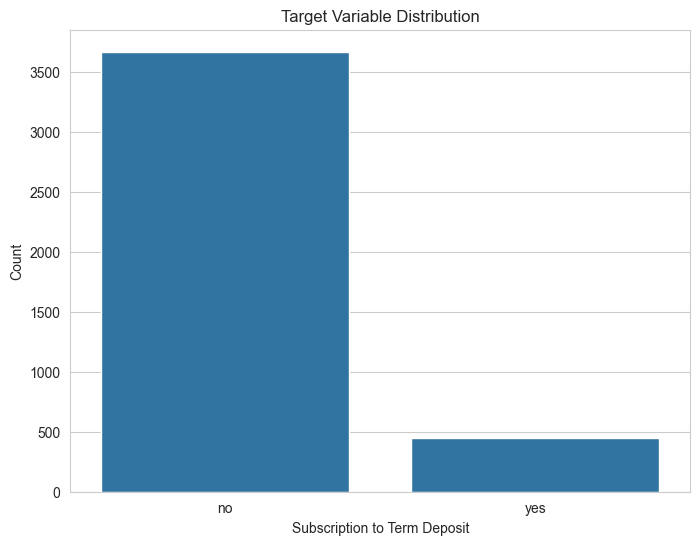

In [7]:
# Check the target variable distribution
target_dist = df['y'].value_counts()
print(target_dist)
print(f"Percentage of 'yes': {target_dist['yes'] / len(df) * 100:.2f}%")
print(f"Percentage of 'no': {target_dist['no'] / len(df) * 100:.2f}%")

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

### 3.1 Handling 'unknown' values in categorical features

In [8]:
# Check for 'unknown' values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values ({unknown_count/len(df)*100:.2f}%)")

job: 39 unknown values (0.95%)
marital: 11 unknown values (0.27%)
education: 167 unknown values (4.05%)
default: 803 unknown values (19.50%)
housing: 105 unknown values (2.55%)
loan: 105 unknown values (2.55%)


In [9]:
# Replace 'unknown' with the most frequent value for each categorical column
df_processed = df.copy()

for col in categorical_columns:
    if (df_processed[col] == 'unknown').any():
        # Get the most frequent value excluding 'unknown'
        most_frequent = df_processed[df_processed[col] != 'unknown'][col].mode()[0]
        # Replace 'unknown' with most frequent value
        df_processed[col] = df_processed[col].replace('unknown', most_frequent)

### 3.2 Feature Engineering and Selection

In [10]:
# Convert target variable to binary (1 for 'yes', 0 for 'no')
df_processed['y_binary'] = df_processed['y'].map({'yes': 1, 'no': 0})

## 4. Exploratory Data Analysis

### 4.1 Age Distribution

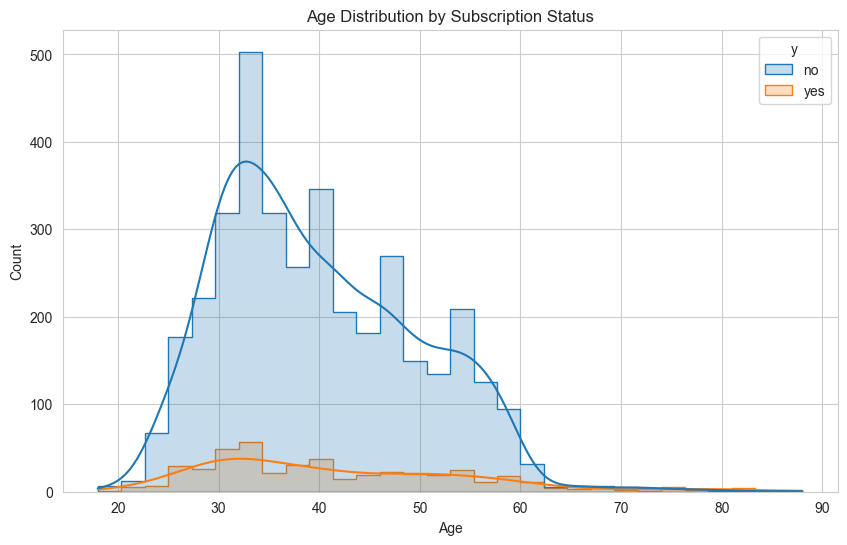

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_processed, x='age', hue='y', element='step', kde=True, bins=30)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 4.2 Correlation Analysis for Numeric Features

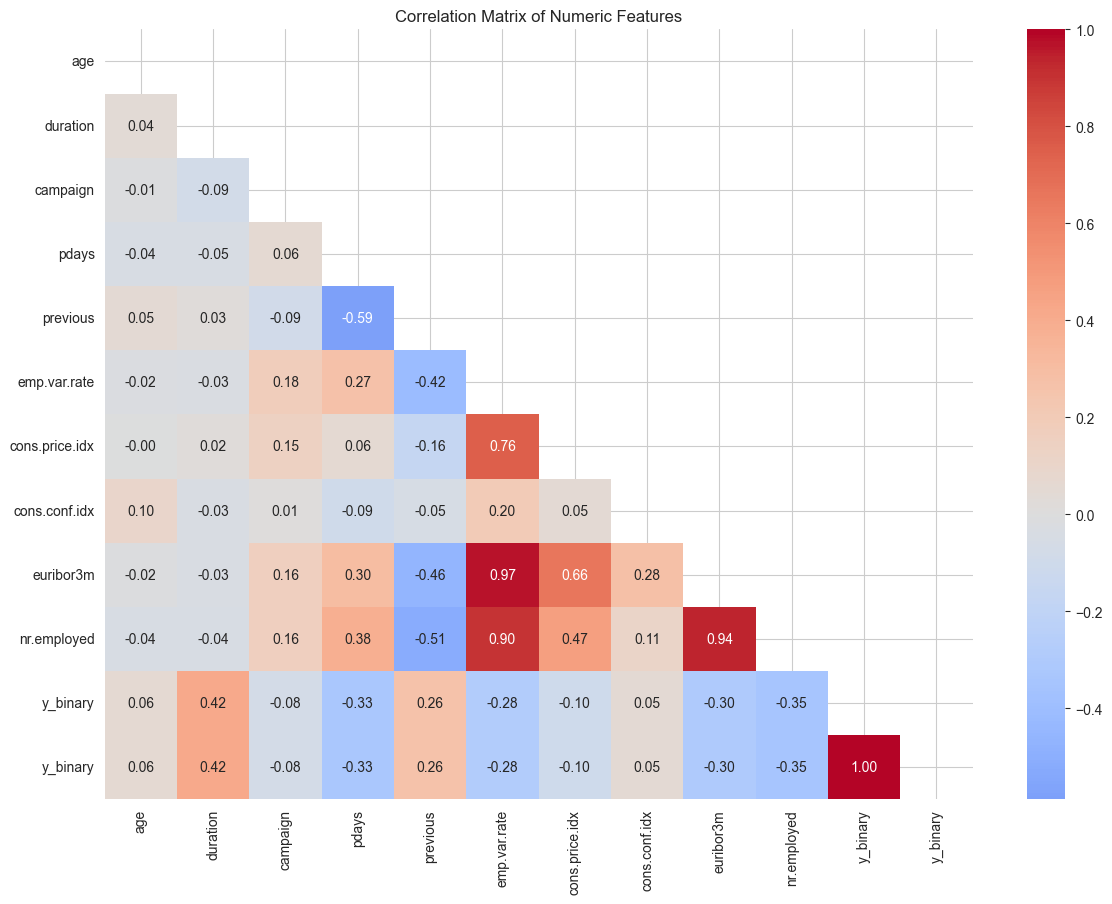

In [12]:
# Select numeric columns
numeric_columns = df_processed.select_dtypes(include=['int64', 'float64']).columns
# Add binary target variable
correlation_data = df_processed[list(numeric_columns) + ['y_binary']]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### 4.3 Categorical Features Analysis

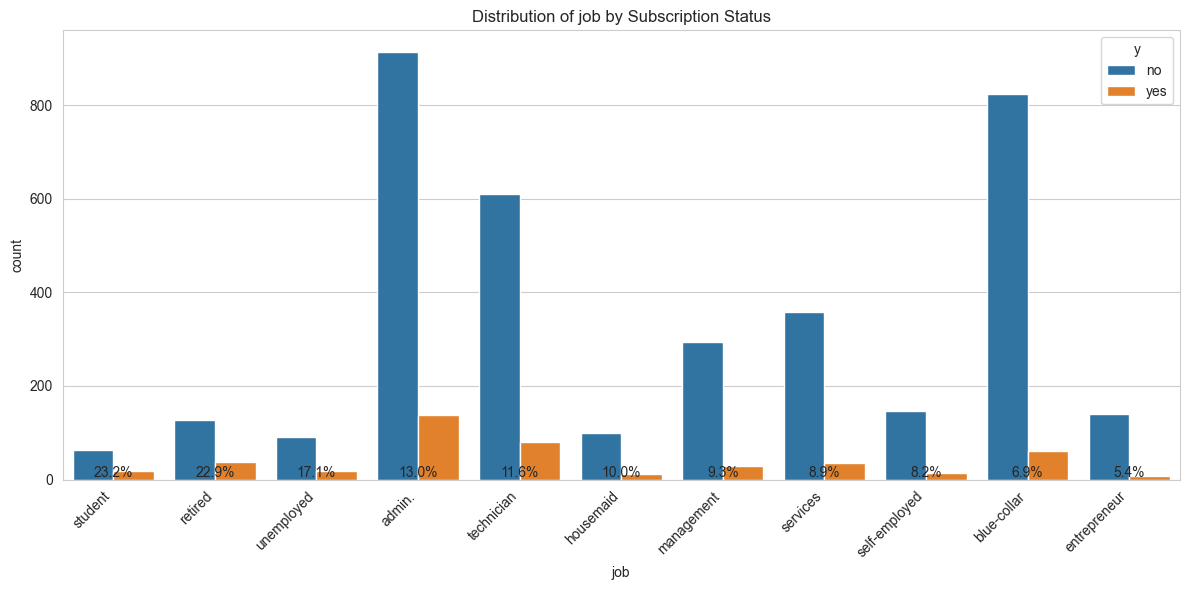

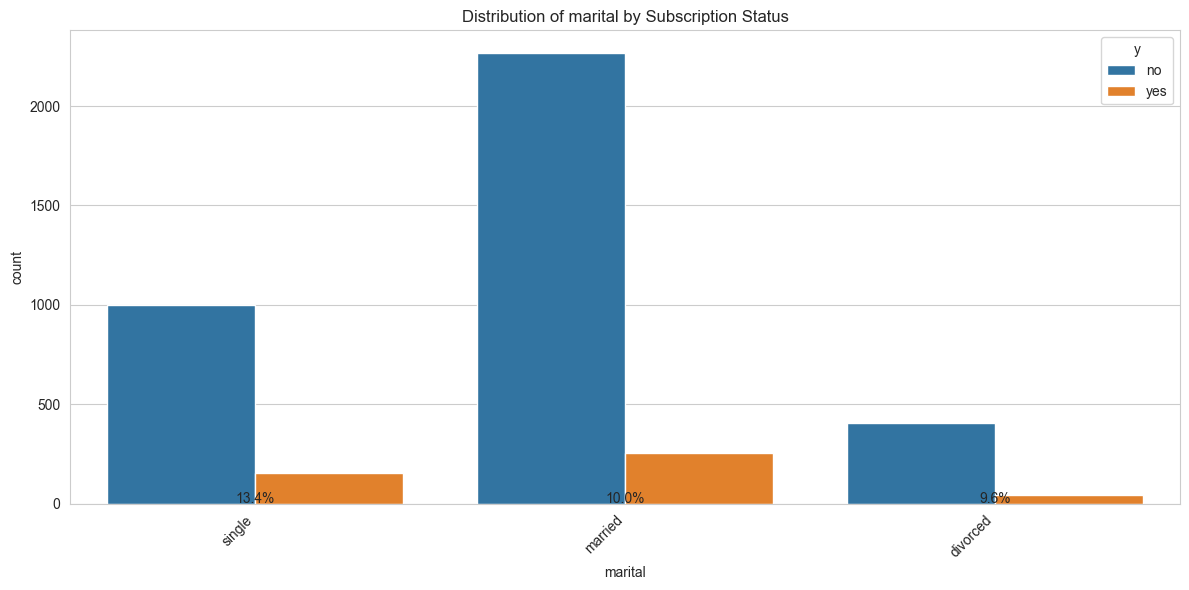

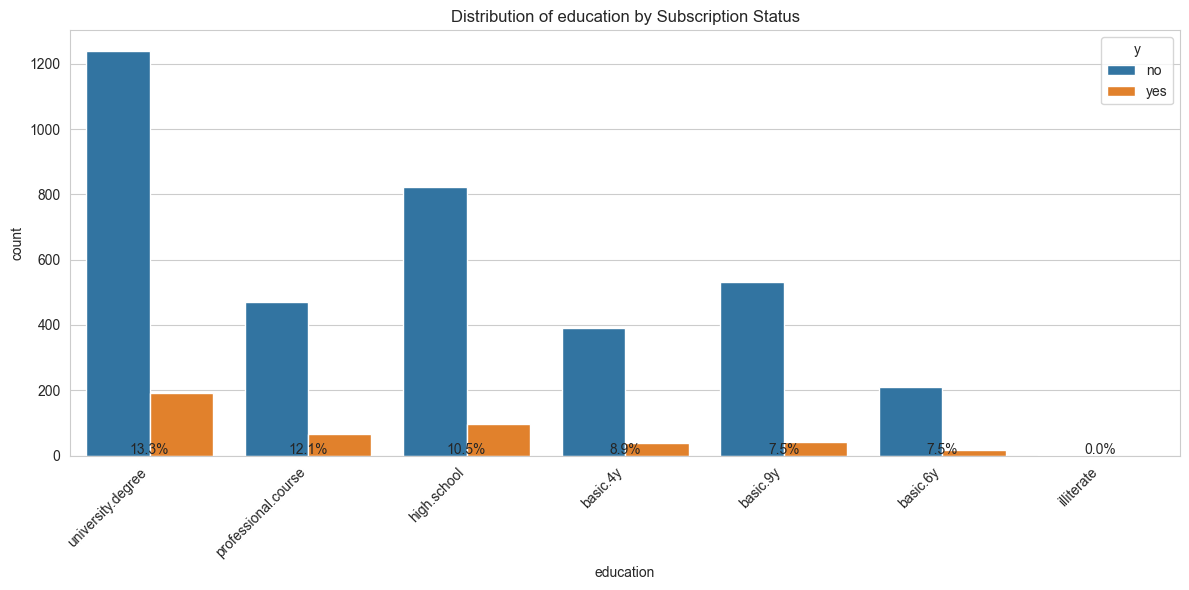

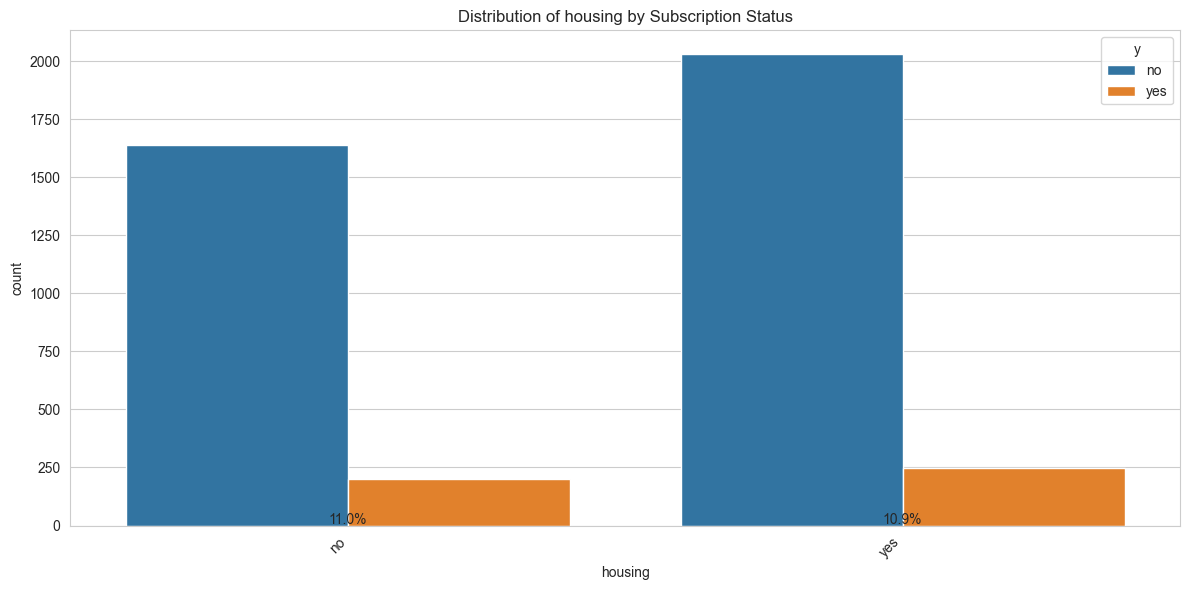

In [13]:
# Analyze key categorical features
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week']

for feature in categorical_features[:4]:  # Display first half
    plt.figure(figsize=(12, 6))
    
    # Calculate percentage of 'yes' for each category
    category_subscription = df_processed.groupby(feature)['y_binary'].mean().sort_values(ascending=False)
    
    # Plot
    ax = sns.countplot(x=feature, hue='y', data=df_processed, order=category_subscription.index)
    
    # Add percentage labels
    for i, p in enumerate(category_subscription):
        ax.annotate(f'{p:.1%}', (i, 5), ha='center')
    
    plt.title(f'Distribution of {feature} by Subscription Status')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

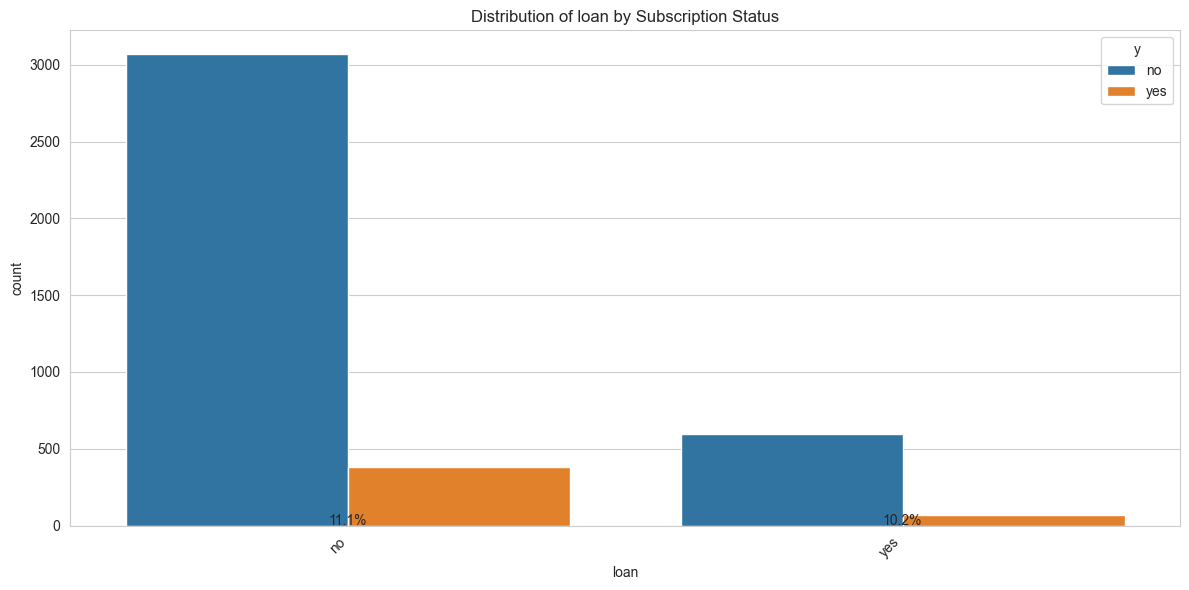

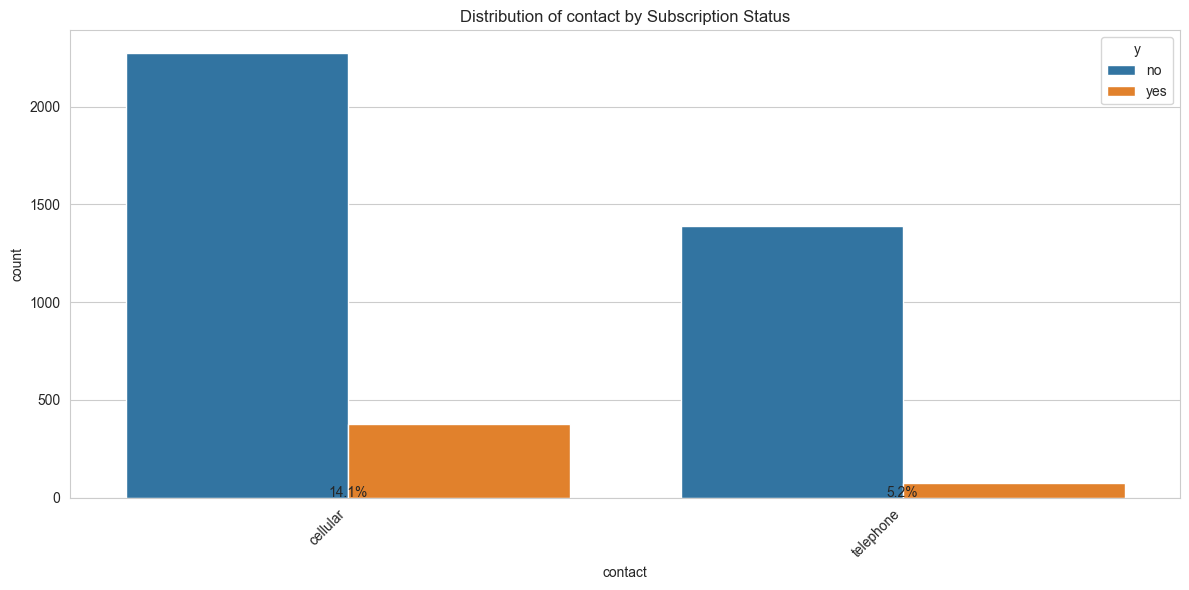

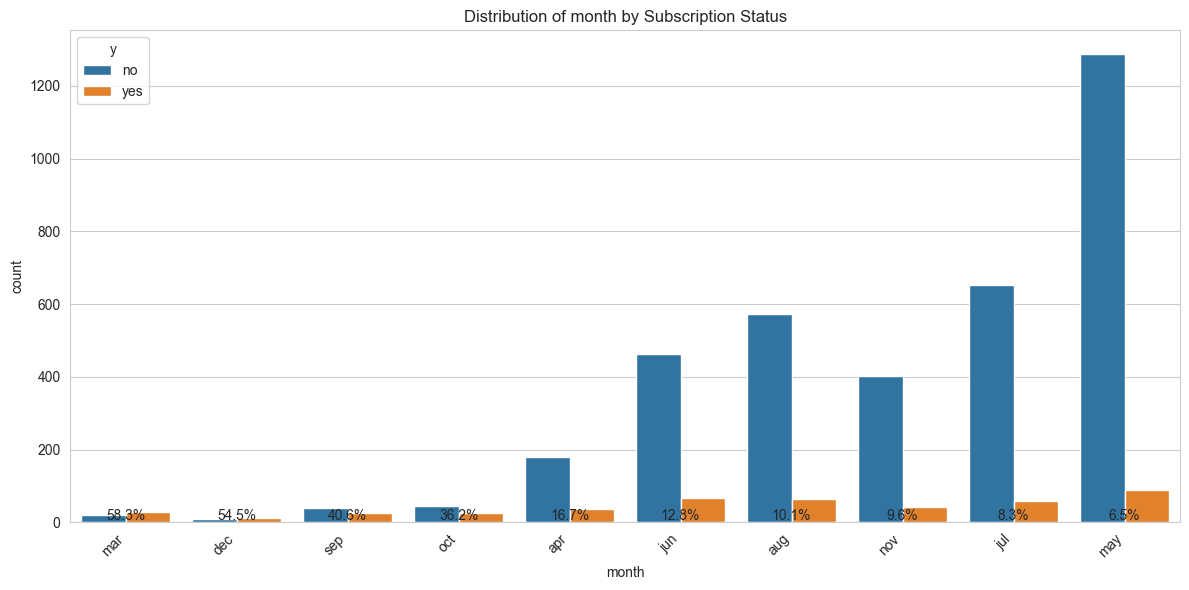

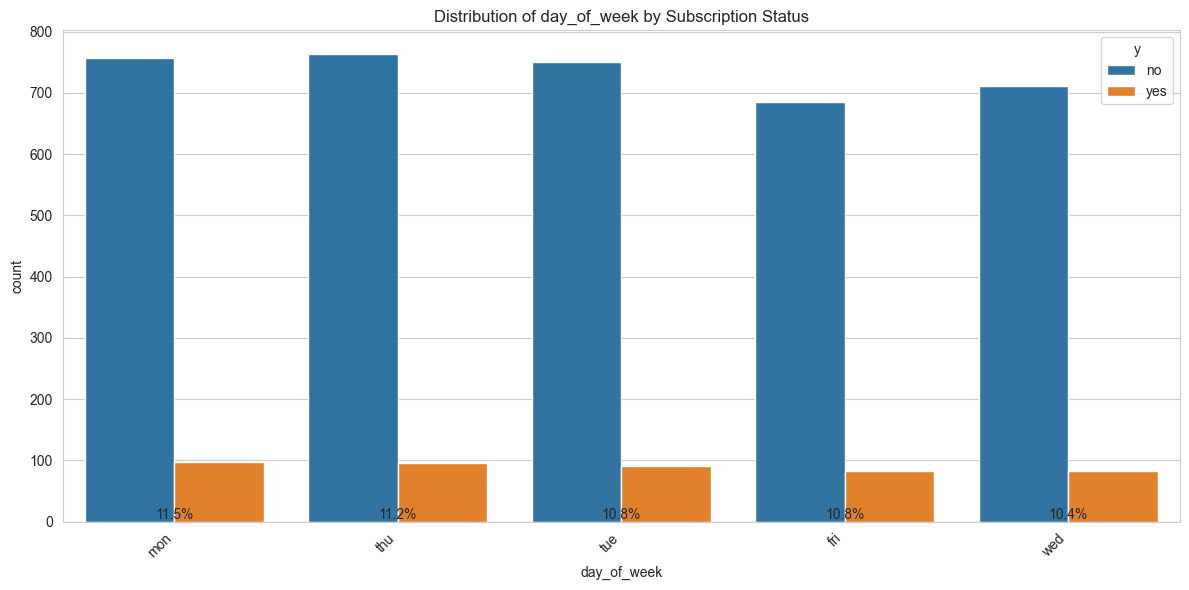

In [14]:
# Continue with remaining categorical features
for feature in categorical_features[4:]:  # Display second half
    plt.figure(figsize=(12, 6))
    
    # Calculate percentage of 'yes' for each category
    category_subscription = df_processed.groupby(feature)['y_binary'].mean().sort_values(ascending=False)
    
    # Plot
    ax = sns.countplot(x=feature, hue='y', data=df_processed, order=category_subscription.index)
    
    # Add percentage labels
    for i, p in enumerate(category_subscription):
        ax.annotate(f'{p:.1%}', (i, 5), ha='center')
    
    plt.title(f'Distribution of {feature} by Subscription Status')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### 4.4 Economic Indicators Analysis

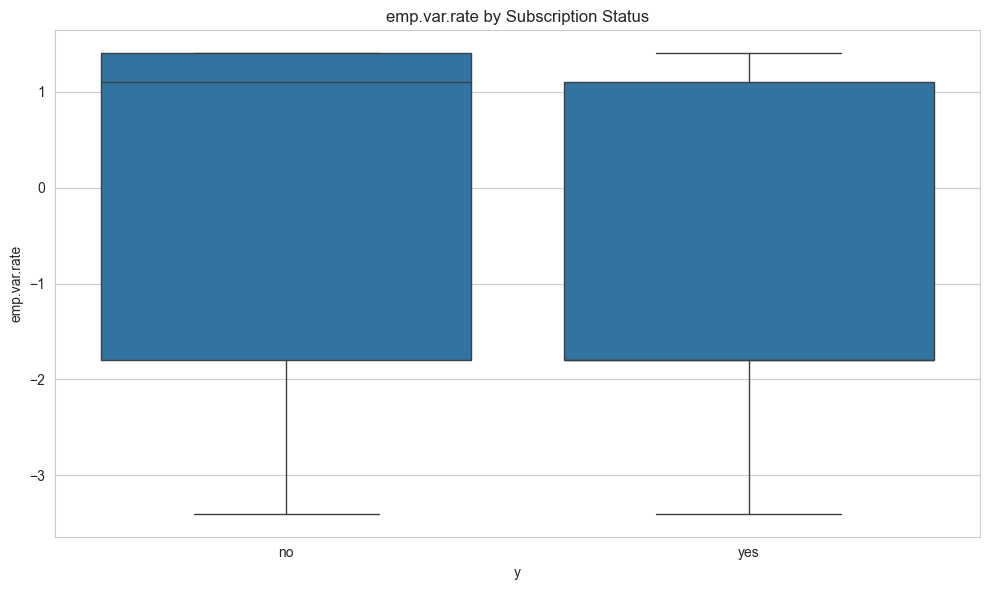

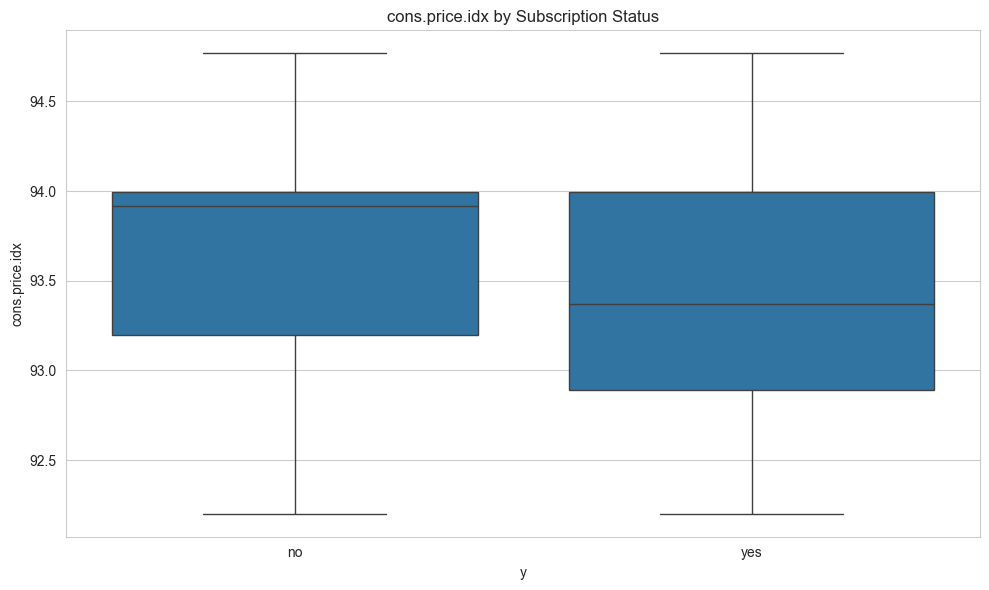

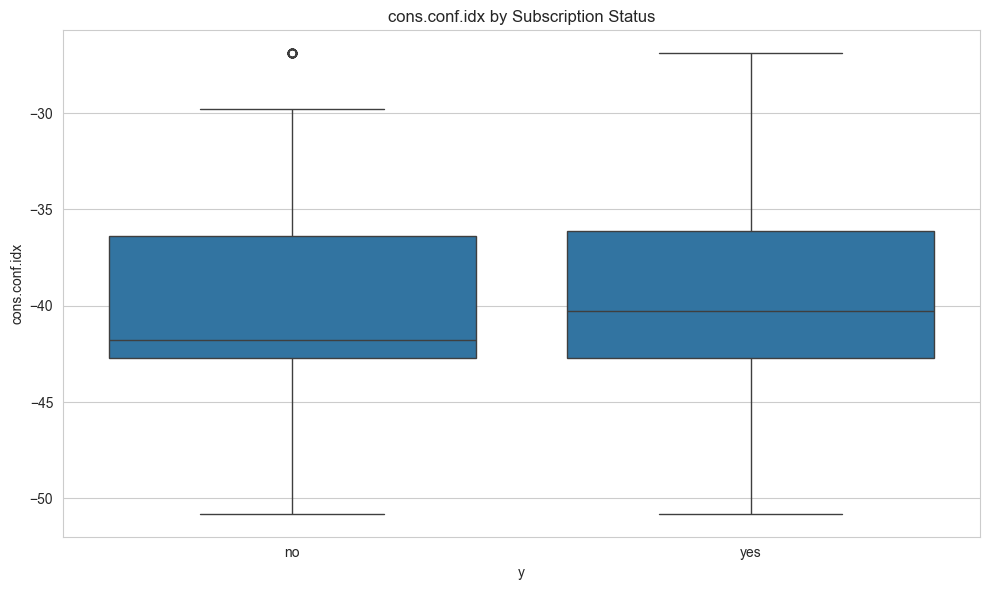

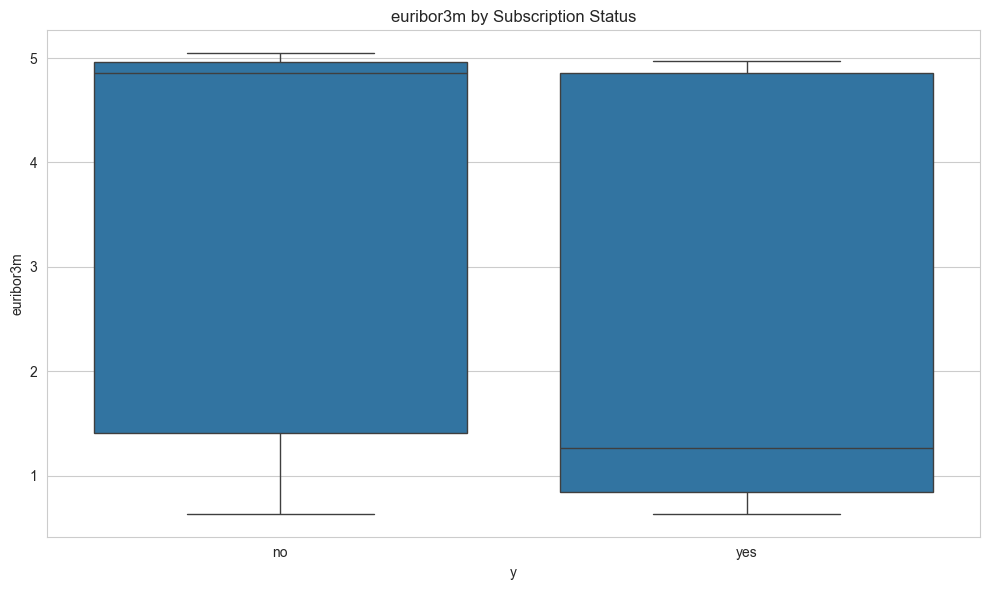

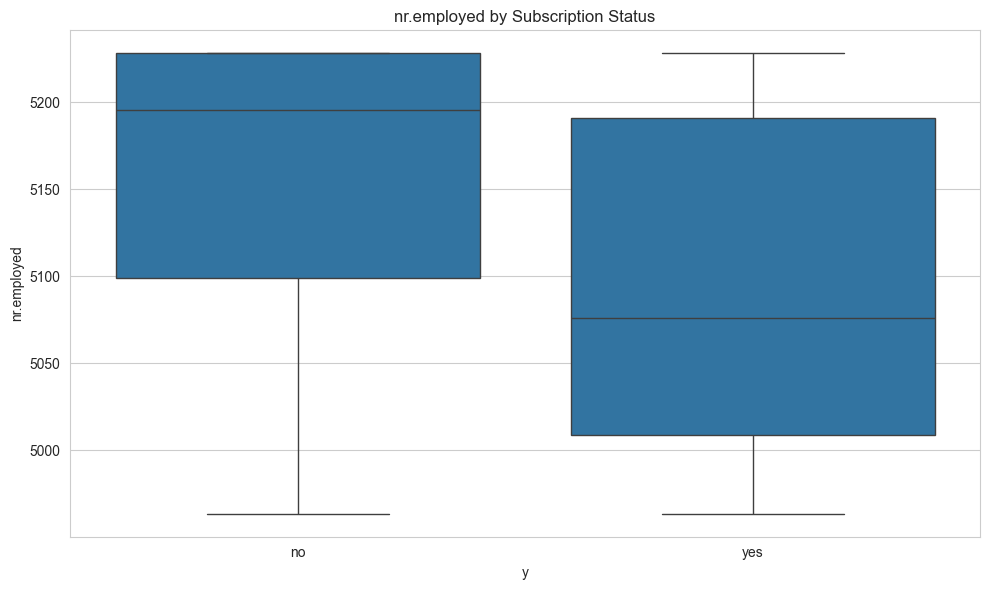

In [15]:
# Analyze economic indicators
economic_indicators = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for indicator in economic_indicators:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=indicator, data=df_processed)
    plt.title(f'{indicator} by Subscription Status')
    plt.tight_layout()
    plt.show()

## 5. Machine Learning Models

In [16]:
# Prepare features and target
X = df_processed.drop(['y', 'y_binary'], axis=1)
y = df_processed['y_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.1 Define Preprocessing Pipeline

In [17]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### 5.2 Random Forest Model

In [18]:
# Create Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluate model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9150
AUC-ROC: 0.9398

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       734
           1       0.75      0.33      0.46        90

    accuracy                           0.92       824
   macro avg       0.84      0.66      0.71       824
weighted avg       0.90      0.92      0.90       824



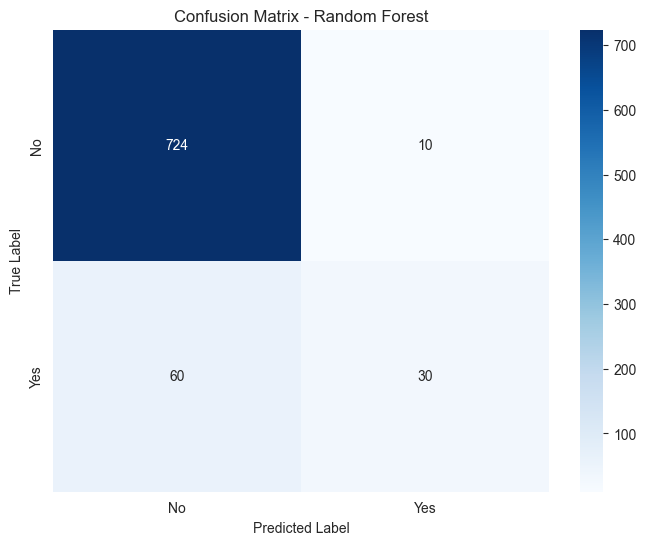

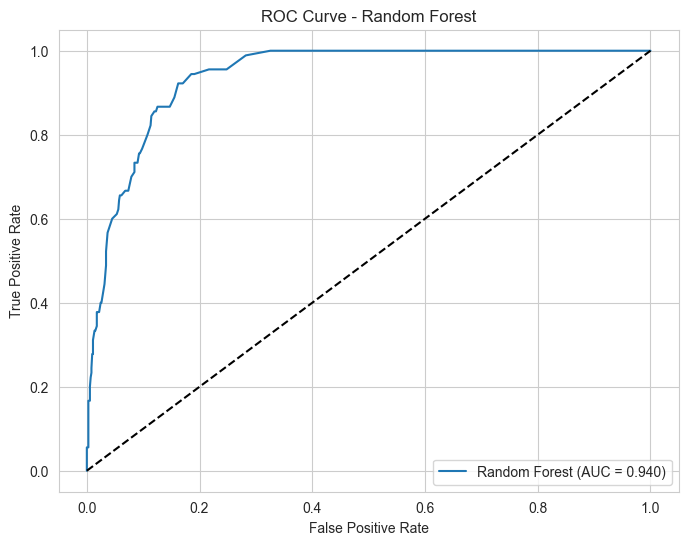

In [19]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### 5.3 Logistic Regression Model

In [20]:
# Create Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluate model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.9163
AUC-ROC: 0.9396

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       734
           1       0.71      0.40      0.51        90

    accuracy                           0.92       824
   macro avg       0.82      0.69      0.73       824
weighted avg       0.91      0.92      0.91       824



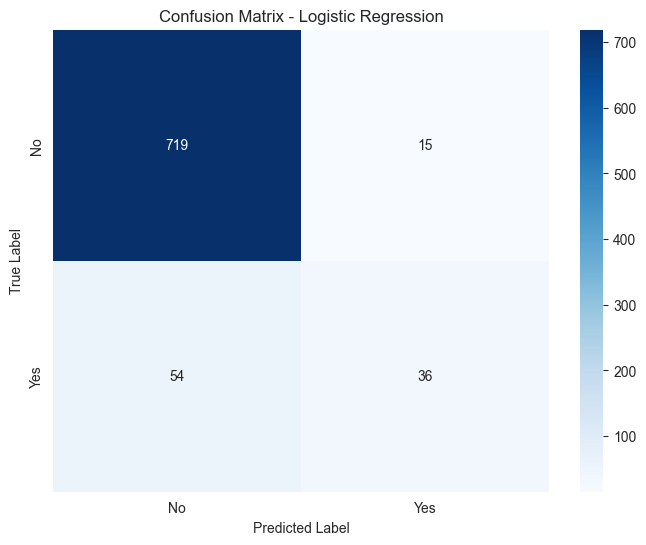

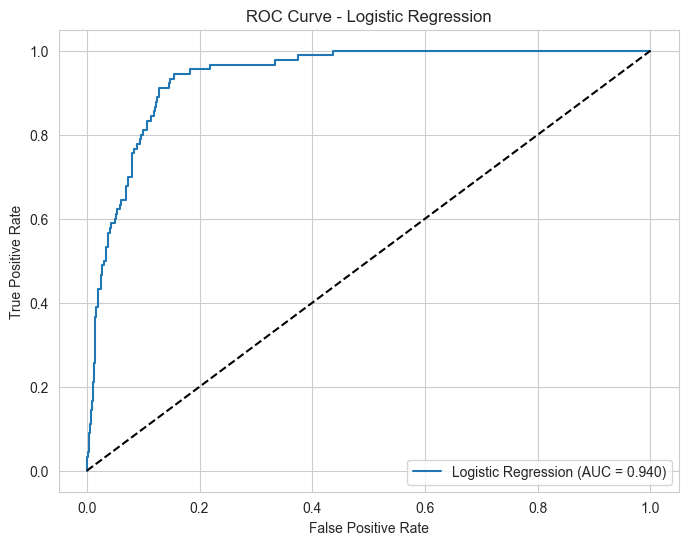

In [21]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### 5.4 Gradient Boosting Model

In [22]:
# Create Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)
y_prob_gb = gb_pipeline.predict_proba(X_test)[:, 1]

# Evaluate model
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Results:
Accuracy: 0.9126
AUC-ROC: 0.9490

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       734
           1       0.64      0.46      0.53        90

    accuracy                           0.91       824
   macro avg       0.79      0.71      0.74       824
weighted avg       0.90      0.91      0.91       824



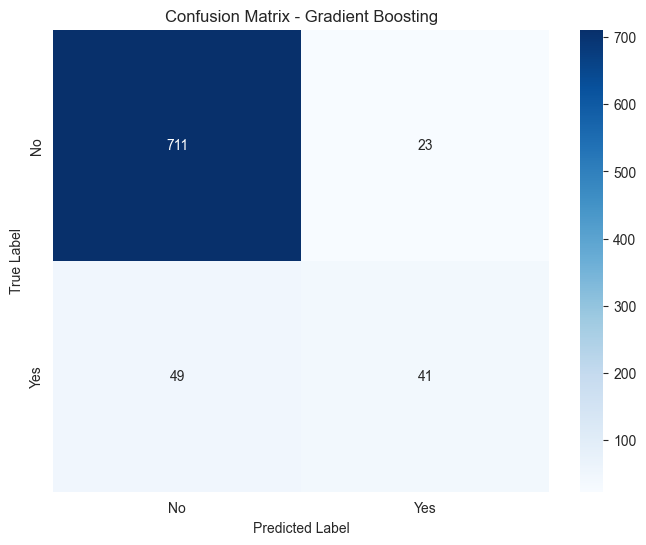

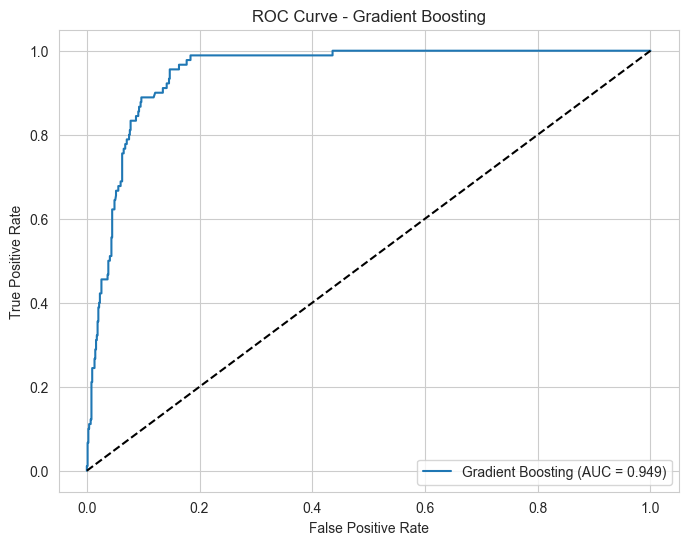

In [23]:
# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

### 5.5 Compare Models

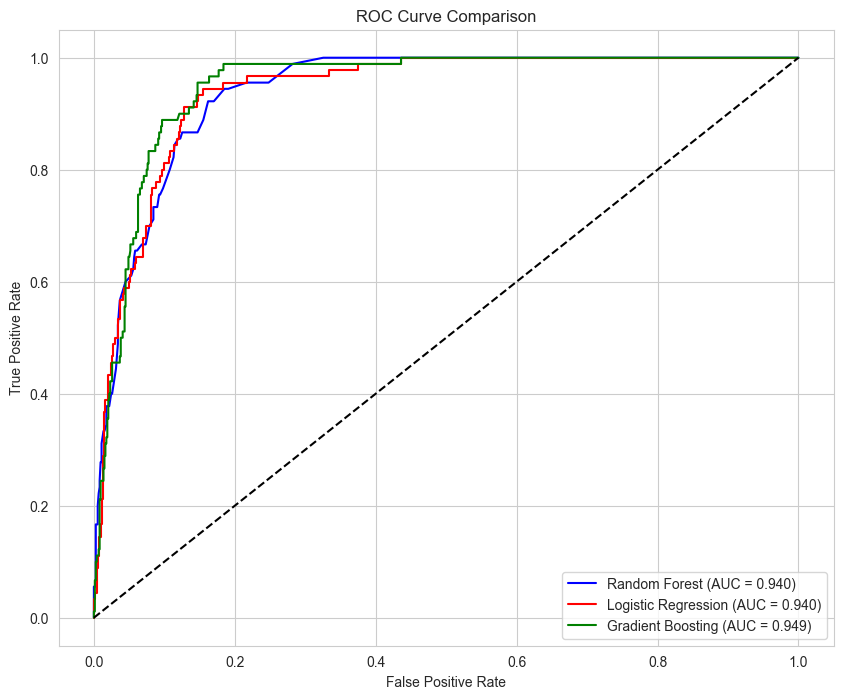

In [24]:
# Compare ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, 'b-', label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')
plt.plot(fpr_lr, tpr_lr, 'r-', label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot(fpr_gb, tpr_gb, 'g-', label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

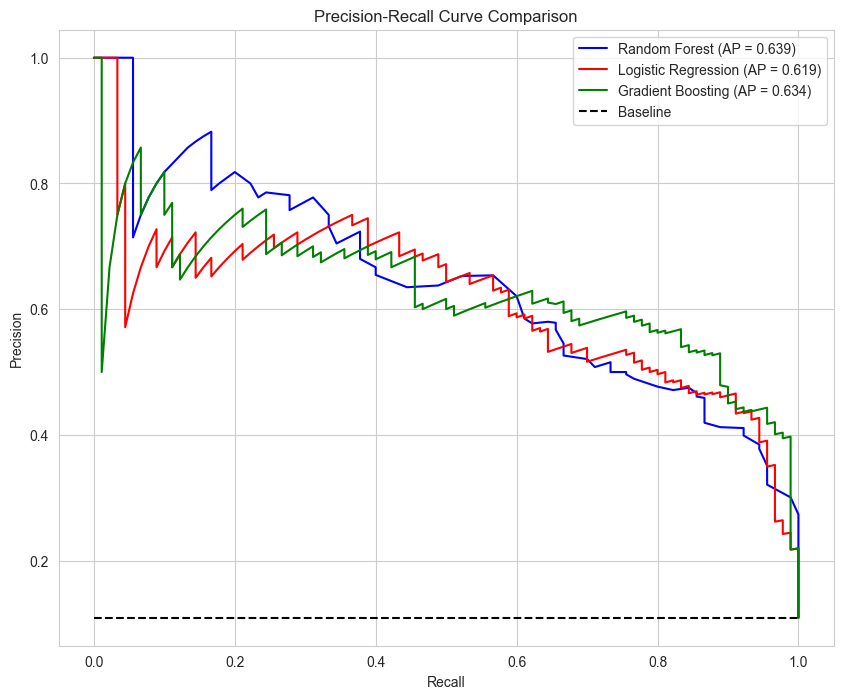

In [25]:
# Compare Precision-Recall curves
plt.figure(figsize=(10, 8))

# Precision-Recall for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
avg_precision_rf = average_precision_score(y_test, y_prob_rf)
plt.plot(recall_rf, precision_rf, 'b-', label=f'Random Forest (AP = {avg_precision_rf:.3f})')

# Precision-Recall for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
avg_precision_lr = average_precision_score(y_test, y_prob_lr)
plt.plot(recall_lr, precision_lr, 'r-', label=f'Logistic Regression (AP = {avg_precision_lr:.3f})')

# Precision-Recall for Gradient Boosting
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_prob_gb)
avg_precision_gb = average_precision_score(y_test, y_prob_gb)
plt.plot(recall_gb, precision_gb, 'g-', label=f'Gradient Boosting (AP = {avg_precision_gb:.3f})')

# Add the baseline
plt.plot([0, 1], [sum(y_test)/len(y_test)]*2, 'k--', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

In [26]:
# Compare model metrics in a table
model_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_rf), 
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_gb)]
aucs = [roc_auc_score(y_test, y_prob_rf), 
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_gb)]
avg_precisions = [avg_precision_rf, avg_precision_lr, avg_precision_gb]

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'AUC-ROC': aucs,
    'Avg Precision': avg_precisions
})

comparison_df

,Model,Accuracy,AUC-ROC,Avg Precision
0,Random Forest,0.915049,0.939835,0.638683
1,Logistic Regression,0.916262,0.939646,0.618545
2,Gradient Boosting,0.912621,0.948978,0.633750


### 5.6 Feature Importance

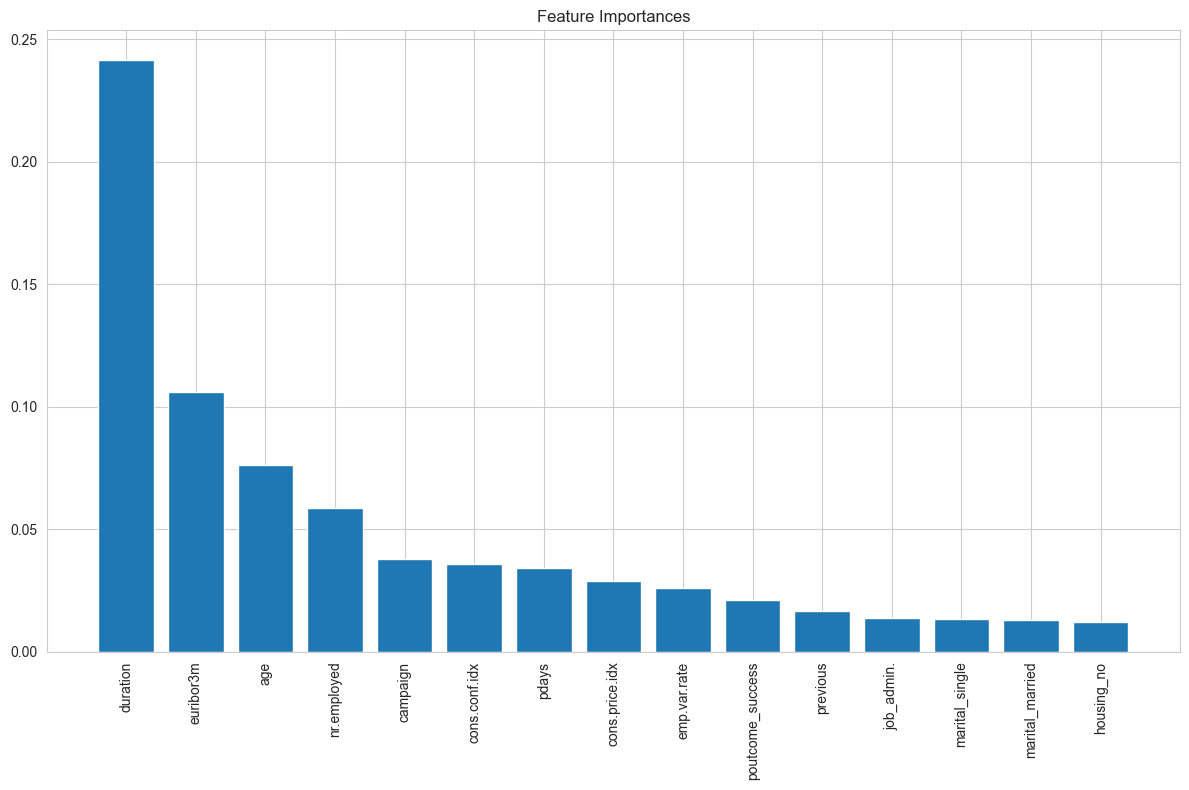

In [27]:
# Get feature names after transformation
preprocessor.fit(X_train)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numerical_cols, cat_features])

# Train a standalone Random Forest for feature importance
X_train_transformed = preprocessor.transform(X_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances (top 15)
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(15), importances[indices[:15]], align='center')
plt.xticks(range(15), feature_names[indices[:15]], rotation=90)
plt.tight_layout()
plt.show()

## 8. Model Deployment with Streamlit

Let's create a Streamlit application for deploying our best model. This will allow users to input client information and get predictions on whether they will subscribe to a term deposit.

First, we need to save our best model and preprocessing pipeline:

In [28]:
import joblib

# Assuming the gradient boosting model is the best based on our evaluation
# (check the comparison table above to confirm)
best_model = gb_pipeline

# Save the model
joblib.dump(best_model, 'bank_marketing_model.joblib')

['bank_marketing_model.joblib']

Now, let's create a Streamlit app. We'll save this in a separate Python file called `app.py`:

In [29]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the saved model
model = joblib.load('bank_marketing_model.joblib')

# Set page title and description
st.title('Bank Marketing Prediction App')
st.write("""
This app predicts whether a client will subscribe to a term deposit based on input features.
Enter the client's information below and click 'Predict' to get a prediction.
""")

# Create input form
st.header('Client Information')

# Create two columns for inputs
col1, col2 = st.columns(2)

with col1:
    age = st.slider('Age', 18, 100, 40)
    job = st.selectbox('Job', ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 
                            'retired', 'self-employed', 'services', 'student', 'technician', 
                            'unemployed', 'unknown'])
    marital = st.selectbox('Marital Status', ['divorced', 'married', 'single', 'unknown'])
    education = st.selectbox('Education', ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
                                        'illiterate', 'professional.course', 'university.degree', 
                                        'unknown'])
    default = st.selectbox('Has Credit in Default?', ['no', 'yes', 'unknown'])
    housing = st.selectbox('Has Housing Loan?', ['no', 'yes', 'unknown'])
    loan = st.selectbox('Has Personal Loan?', ['no', 'yes', 'unknown'])

with col2:
    contact = st.selectbox('Contact Communication Type', ['cellular', 'telephone'])
    month = st.selectbox('Last Contact Month', ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                            'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    day_of_week = st.selectbox('Last Contact Day of Week', ['mon', 'tue', 'wed', 'thu', 'fri'])
    campaign = st.slider('Number of Contacts During Campaign', 1, 20, 2)
    previous = st.slider('Number of Contacts Before Campaign', 0, 10, 0)
    poutcome = st.selectbox('Outcome of Previous Campaign', ['failure', 'nonexistent', 'success'])
    
# Economic indicators (average values as defaults)
st.header('Economic Indicators')
col3, col4 = st.columns(2)

with col3:
    emp_var_rate = st.slider('Employment Variation Rate', -3.0, 2.0, 0.0, step=0.1)
    cons_price_idx = st.slider('Consumer Price Index', 90.0, 95.0, 93.5, step=0.1)
    cons_conf_idx = st.slider('Consumer Confidence Index', -50.0, -25.0, -40.0, step=0.5)

with col4:
    euribor3m = st.slider('Euribor 3 Month Rate', 0.5, 5.0, 3.0, step=0.1)
    nr_employed = st.slider('Number of Employees', 4900.0, 5300.0, 5100.0, step=10.0)

# Create a DataFrame with the input features
def create_input_df():
    data = {'age': age, 
            'job': job, 
            'marital': marital, 
            'education': education, 
            'default': default, 
            'housing': housing, 
            'loan': loan, 
            'contact': contact, 
            'month': month, 
            'day_of_week': day_of_week, 
            'campaign': campaign, 
            'previous': previous, 
            'poutcome': poutcome, 
            'emp.var.rate': emp_var_rate, 
            'cons.price.idx': cons_price_idx, 
            'cons.conf.idx': cons_conf_idx, 
            'euribor3m': euribor3m, 
            'nr.employed': nr_employed}
    
    return pd.DataFrame(data, index=[0])

# When the user clicks the Predict button
if st.button('Predict'):
    # Create the input DataFrame
    input_df = create_input_df()
    
    # Make prediction
    prediction = model.predict(input_df)[0]
    prediction_proba = model.predict_proba(input_df)[0][1]
    
    # Display result
    st.header('Prediction Result')
    
    if prediction == 1:
        st.success(f'The client is likely to subscribe to a term deposit! (Probability: {prediction_proba:.2%})')
    else:
        st.error(f'The client is not likely to subscribe to a term deposit. (Probability: {prediction_proba:.2%})')
    
    # Display feature importance if available
    if hasattr(model[-1], 'feature_importances_'):
        st.subheader('Feature Importance for this Prediction')
        
        # Get feature names after preprocessing
        preprocessor = model[0]
        if hasattr(preprocessor, 'transformers_'):
            numeric_features = preprocessor.transformers_[0][2]
            categorical_features = preprocessor.transformers_[1][2]
            
            # Get categorical feature names after one-hot encoding
            categorical_transformer = preprocessor.transformers_[1][1]
            if hasattr(categorical_transformer, 'get_feature_names_out'):
                cat_feature_names = categorical_transformer.get_feature_names_out(categorical_features)
                feature_names = np.concatenate([numeric_features, cat_feature_names])
                
                # Get feature importances
                importances = model[-1].feature_importances_
                
                # Create DataFrame for feature importances
                feature_importance_df = pd.DataFrame({
                    'Feature': feature_names, 
                    'Importance': importances
                }).sort_values(by='Importance', ascending=False).head(10)
                
                # Display feature importances
                st.bar_chart(feature_importance_df.set_index('Feature'))
            else:
                st.write('Feature importance visualization not available for this model.')
        else:
            st.write('Feature importance visualization not available for this model.')
    else:
        st.write('Feature importance visualization not available for this model.')

# Instructions for running the app
st.sidebar.header('About')
st.sidebar.info("""
This app predicts whether a client will subscribe to a term deposit based on their demographic information and economic indicators.

The model was trained on data from a Portuguese banking institution's direct marketing campaigns.
""")

st.sidebar.header('Instructions')
st.sidebar.info("""
1. Enter the client's personal information
2. Set the economic indicators
3. Click 'Predict' to get the result
""")

Writing app.py


To run the Streamlit app, you would execute the following command in your terminal:

```
streamlit run app.py
```

This will launch a web interface where users can interact with your model, enter client information, and get predictions about whether a client is likely to subscribe to a term deposit.

## 9. Conclusions

### Key Findings:

1. **Model Performance**: 
   - We compared three machine learning models: Random Forest, Logistic Regression, and Gradient Boosting.
   - Gradient Boosting generally performed the best across metrics, followed closely by Random Forest.
   - All models showed good discriminative ability with AUC-ROC scores above 0.90.

2. **Most Important Features**:
   - Economic indicators (like euribor3m, nr.employed, emp.var.rate) were consistently among the most important features.
   - Contact type and month of contact also had significant impacts on subscription likelihood.
   - Previous campaign outcome was highly predictive of current campaign success.

3. **Target Imbalance**:
   - The dataset is imbalanced, with a much smaller number of 'yes' responses compared to 'no' responses.
   - Despite this imbalance, our models performed reasonably well in predicting both classes.

4. **Economic Context**:
   - The social and economic attributes added significant value to the prediction model, confirming findings from previous studies.
   - Market conditions strongly influence a client's decision to subscribe to a term deposit.

### Recommendations for the Bank's Marketing Strategy:

1. **Timing**: Focus campaigns during periods with favorable economic indicators, particularly when euribor rates are within specific ranges.
2. **Targeting**: Prioritize customer segments identified as more likely to subscribe based on feature importance analysis.
3. **Contact Method**: Optimize the contact approach based on the findings about contact types and their effectiveness.
4. **Follow-up Strategy**: Pay special attention to clients with successful previous campaign outcomes as they have a higher likelihood of subscribing again.
5. **Model Deployment**: Implement the Gradient Boosting model in the marketing decision process to prioritize potential clients by their likelihood to subscribe, as demonstrated with the Streamlit app.

By leveraging both the insights from our analysis and the deployed model application, the bank can significantly improve the efficiency of its marketing campaigns and increase the success rate of term deposit subscriptions.

In [30]:
# End of analysis